In [1]:
from TransversalitySheaf import *
from ConleySheaf import *
from FlowSheaf import *
from pychomp import *
from Model import *


import matplotlib.pyplot as plt
from matplotlib import colors

In [2]:
#model_name = 'relaxation_osc'
model_name = 'repressilator'
model = Model(model_name)

In [3]:
params = [4,20]

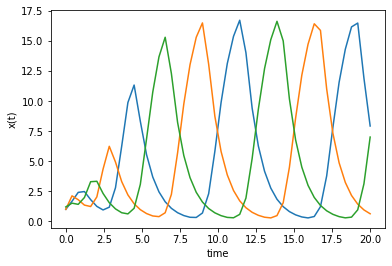

In [4]:
model.simulate([1,1,1.2],params)

In [5]:
base = GeometricCubicalComplex(model.base_bounds,model.base_boxes)
B = base.complex

In [6]:
[a_min,a_max],[b_min,b_max] = base.bounds
a_vert = [a_min+i*base.delta[0] for i in range(base.boxes[0]+1)]
b_vert = [b_min+i*base.delta[1] for i in range(base.boxes[1]+1)]

In [7]:
phase_complex = GeometricCubicalComplex(model.phase_bounds, model.phase_boxes)
X = phase_complex.complex

In [8]:
C, discrete_flow = TransversalityComplex(phase_complex, model.ODE_Model,params,model.num_samples)
FC = FlowComplex(C, discrete_flow)

In [9]:
if X.dimension()==2:
    [xmin,xmax],[ymin,ymax] = phase_complex.bounds
    x_vert = [xmin+i*phase_complex.delta[0] for i in range(phase_complex.boxes[0]+1)]
    y_vert = [ymin+i*phase_complex.delta[1] for i in range(phase_complex.boxes[1]+1)]

In [10]:
if X.dimension()==2:
    # Open figure
    f = plt.figure()
    # Get limits of trajectory plot
    #xmax,ymax = 1.25,1.25
    #ymax = plt.ylim(ymin=0)[1]
    #xmax = plt.xlim(xmin=0)[1]
    # Define number of points
    nb_points = 20
    # Define x and y ranges
    x = np.linspace(xmin, xmax, nb_points)
    y = np.linspace(ymin, ymax, nb_points)
    # Create meshgrid
    X1 , Y1 = np.meshgrid(x,y)
    # Calculate growth rate at each grid point
    DX1, DY1 = model.ODE_Model([X1, Y1],params)
    # Direction at each grid point is the hypotenuse of the prey direction and the
    # predator direction.
    M = (np.hypot(DX1, DY1))
    # This is to avoid any divisions when normalizing
    M[ M == 0] = 1.
    # Normalize the length of each arrow (optional)
    DX1 /= M
    DY1 /= M

    plt.title('Trajectories and direction fields')
    """
    This is using the quiver function to plot the field of arrows using DX1 and
    DY1 for direction and M for speed
    """
    Q = plt.quiver(X1, Y1, DX1, DY1, M, pivot='mid', cmap=plt.cm.plasma)
    plt.xlabel('x')
    plt.ylabel('y')
    #plt.legend(bbox_to_anchor=(1.05, 1.0))
    plt.grid(True)
    plt.xticks(x_vert)
    plt.yticks(y_vert)
    #plt.grid()
    plt.xlim(xmin, xmax)
    plt.ylim(ymin, ymax)
    plt.show()

In [11]:
if X.dimension()==2:
    x_pos = []
    y_pos = []
    x_dir = []
    y_dir = []
    for u in discrete_flow.keys():
        if X.rightfringe(u): continue
        u_barys = [(bounds[1]+bounds[0])/2 for bounds in phase_complex.geometry(u)]
        #print(u,u_barys)
        for v in discrete_flow[u]:
            if X.rightfringe(v): continue
            v_barys = [(bounds[1]+bounds[0])/2 for bounds in phase_complex.geometry(v)]
            x_pos . append (u_barys[0])
            y_pos . append (u_barys[1])
            x_dir . append (v_barys[0]-u_barys[0])
            y_dir . append (v_barys[1]-u_barys[1])

In [12]:
if X.dimension()==2:
    plt.title('Directed Graph')
    """
    This is using the quiver function to plot arrows on top cells
    """
    Q = plt.quiver(x_pos, y_pos, x_dir, y_dir,scale=20)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.grid(True)
    plt.xticks(x_vert)
    plt.yticks(y_vert)
    #plt.grid()
    plt.xlim(xmin, xmax)
    plt.ylim(ymin, ymax)
    plt.show()

In [13]:
GC = GradedComplexObj.induce_from_flow(FC.complex, lambda x: FC.discrete_flow[x])

In [14]:
#DrawGradedComplex(GC.graded_complex,GC.poset)

In [15]:
conley_complex = ConnectionMatrix(GC.graded_complex)
poset = GC.poset
#DrawGradedComplex(conley_complex,poset)

In [16]:
recurrent_poset = Poset(InducedSubgraph(TransitiveClosure(poset.get_children()),
                                                lambda v : v in conley_complex.count()))

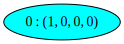

In [17]:
DrawGradedComplex(conley_complex,recurrent_poset)